# **1) Import Libraries**

In [ ]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, cohen_kappa_score,auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.cluster import KMeans
import copy
from scipy import ndimage, misc
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import cv2
from sklearn.svm import SVR
import pandas as pd
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from scipy.spatial.distance import pdist


# **2) Load Data**

In [ ]:
data = pd.read_excel('./Dummy dataset.xlsx')

# About the Dataset
**The Abu Dhabi Commercial Bank (ADCB) has provided Zewail City with a sample dataset for loans’ data.**

# Data Description


*   **Total O/S**: Total loan amount
*   **TENOR_@Booking:** Duration in months for the loan
*   **Loan Term:** Duration in years
*   **Booking Date:** The date on which the loan data is entered
*   **Maturity Date:** the date on which a borrower's final loan payment is due.
*   **DPD:** Days past dues, a metric that indicates whether a customer have been consistent in his/her repayments and if he/she have missed any, how many instalments did the customer miss and by how many days.
*   **DOB:** Date of Birth of the client
*   **Age:** age of the client.
*   **Gender:** gender of the client.
*   **Customer Segment:** classification of the customer based on the type of employment.


# **2) Data Exploration**

# Count missing values in each column

In [ ]:
data.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,1948-04-04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,1967-12-27,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,1963-08-01,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,1946-10-26,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,1945-02-17,MALE,Salaried


In [ ]:
data['Customer Segment'].unique()

array(['Salaried', 'Self Employed & Professional', nan], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total O/S         38685 non-null  float64       
 1   TENOR_@Booking    38685 non-null  int64         
 2   Loan Term         38685 non-null  object        
 3   BOOKING_DATE      38685 non-null  datetime64[ns]
 4   MATURITY_DATE     38685 non-null  datetime64[ns]
 5    DPD              38685 non-null  int64         
 6   DOB               38601 non-null  datetime64[ns]
 7   AGE               38601 non-null  float64       
 8   AGE at Maturity   38601 non-null  datetime64[ns]
 9   GENDER            38677 non-null  object        
 10  Customer Segment  38666 non-null  object        
dtypes: datetime64[ns](4), float64(2), int64(2), object(3)
memory usage: 3.2+ MB


**Check the null values**

In [ ]:
data.isna().sum()

Total O/S            0
TENOR_@Booking       0
Loan Term            0
BOOKING_DATE         0
MATURITY_DATE        0
 DPD                 0
DOB                 84
AGE                 84
AGE at Maturity     84
GENDER               8
Customer Segment    19
dtype: int64

**Drop Nulls**

In [ ]:
#Drop Nulls
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Total O/S           0
TENOR_@Booking      0
Loan Term           0
BOOKING_DATE        0
MATURITY_DATE       0
 DPD                0
DOB                 0
AGE                 0
AGE at Maturity     0
GENDER              0
Customer Segment    0
dtype: int64

**Count duplicated rows**

In [ ]:
data.duplicated().sum()

798

**There is duplicates in the dataset**

**Remove Duplicates**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(37779, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total O/S         37779 non-null  float64       
 1   TENOR_@Booking    37779 non-null  int64         
 2   Loan Term         37779 non-null  object        
 3   BOOKING_DATE      37779 non-null  datetime64[ns]
 4   MATURITY_DATE     37779 non-null  datetime64[ns]
 5    DPD              37779 non-null  int64         
 6   DOB               37779 non-null  datetime64[ns]
 7   AGE               37779 non-null  float64       
 8   AGE at Maturity   37779 non-null  datetime64[ns]
 9   GENDER            37779 non-null  object        
 10  Customer Segment  37779 non-null  object        
dtypes: datetime64[ns](4), float64(2), int64(2), object(3)
memory usage: 3.5+ MB


# **3) Feature Engineering and Data Cleaning**

**1- Total O/S Feature.**

In [ ]:
data['Total O/S']

0        178630.00
1        376444.57
2        253984.28
3        779620.11
4        103377.43
           ...    
38680         8.14
38681         5.27
38682         5.15
38683         2.19
38684         0.74
Name: Total O/S, Length: 37779, dtype: float64

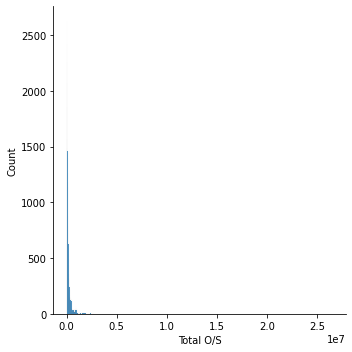

In [ ]:
sns.displot(data['Total O/S']);


**2- Drop Loan Term (Duration in years) because it doesn't add new information since TENOR_@Booking is the Duration in months for the loan.**

In [ ]:
data.drop('Loan Term',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total O/S         37779 non-null  float64       
 1   TENOR_@Booking    37779 non-null  int64         
 2   BOOKING_DATE      37779 non-null  datetime64[ns]
 3   MATURITY_DATE     37779 non-null  datetime64[ns]
 4    DPD              37779 non-null  int64         
 5   DOB               37779 non-null  datetime64[ns]
 6   AGE               37779 non-null  float64       
 7   AGE at Maturity   37779 non-null  datetime64[ns]
 8   GENDER            37779 non-null  object        
 9   Customer Segment  37779 non-null  object        
dtypes: datetime64[ns](4), float64(2), int64(2), object(2)
memory usage: 3.2+ MB


**3- Obtaining some statistics from BOOKING_DATE column.**

In [ ]:
data['BOOKING_DATE']

0       2019-07-31
1       2019-03-04
2       2019-05-05
3       2021-04-26
4       2021-04-27
           ...    
38680   2013-02-28
38681   2014-03-04
38682   2013-02-21
38683   2015-02-25
38684   2012-10-23
Name: BOOKING_DATE, Length: 37779, dtype: datetime64[ns]

In [ ]:
# Obtaining some statistics from BOOKING_DATE column.
data['BOOKING_day'] = data['BOOKING_DATE'].dt.day_name()
data['BOOKING_month'] = data['BOOKING_DATE'].dt.month_name()
data['BOOKING_year_month'] = data['BOOKING_DATE'].dt.to_period('M')

data['BOOKING_dayN'] = data['BOOKING_DATE'].dt.day
data['BOOKING_yearN'] = data['BOOKING_DATE'].dt.year
data['BOOKING_monthN'] = data['BOOKING_DATE'].dt.month

In [ ]:
data.head()

,Total O/S,TENOR_@Booking,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment,BOOKING_day,BOOKING_month,BOOKING_year_month,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN
0,178630.00,120,2019-07-31,2029-04-03,0,1983-06-23,38.469863,1948-04-04,MALE,Salaried,Wednesday,July,2019-07,31,2019,7
1,376444.57,120,2019-03-04,2028-07-03,0,1963-09-30,58.212329,1967-12-27,MALE,Salaried,Monday,March,2019-03,4,2019,3
2,253984.28,84,2019-05-05,2025-07-03,0,1965-02-24,56.806849,1963-08-01,MALE,Salaried,Sunday,May,2019-05,5,2019,5
3,779620.11,108,2021-04-26,2030-04-25,5,1983-12-01,38.028767,1946-10-26,MALE,Self Employed & Professional,Monday,April,2021-04,26,2021,4
4,103377.43,60,2021-04-27,2026-04-25,0,1981-08-08,40.343836,1945-02-17,MALE,Salaried,Tuesday,April,2021-04,27,2021,4


In [ ]:
data['BOOKING_day'].describe()

count        37779
unique           7
top       Thursday
freq          8571
Name: BOOKING_day, dtype: object

In [ ]:
data['BOOKING_month'].describe()

count         37779
unique           12
top       September
freq           3794
Name: BOOKING_month, dtype: object

In [ ]:
data['BOOKING_year_month'].describe()

count       37779
unique        108
top       2020-10
freq         1482
Name: BOOKING_year_month, dtype: object

In [ ]:
data['BOOKING_dayN'].describe()

count    37779.000000
mean        17.519786
std          9.259587
min          1.000000
25%         10.000000
50%         18.000000
75%         26.000000
max         31.000000
Name: BOOKING_dayN, dtype: float64

In [ ]:
data['BOOKING_yearN'].describe()

count    37779.000000
mean      2018.384155
std          2.245658
min       2012.000000
25%       2017.000000
50%       2019.000000
75%       2020.000000
max       2021.000000
Name: BOOKING_yearN, dtype: float64

In [ ]:
data['BOOKING_monthN'].describe()

count    37779.000000
mean         6.358744
std          3.353938
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: BOOKING_monthN, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Total O/S           37779 non-null  float64       
 1   TENOR_@Booking      37779 non-null  int64         
 2   BOOKING_DATE        37779 non-null  datetime64[ns]
 3   MATURITY_DATE       37779 non-null  datetime64[ns]
 4    DPD                37779 non-null  int64         
 5   DOB                 37779 non-null  datetime64[ns]
 6   AGE                 37779 non-null  float64       
 7   AGE at Maturity     37779 non-null  datetime64[ns]
 8   GENDER              37779 non-null  object        
 9   Customer Segment    37779 non-null  object        
 10  BOOKING_day         37779 non-null  object        
 11  BOOKING_month       37779 non-null  object        
 12  BOOKING_year_month  37779 non-null  period[M]     
 13  BOOKING_dayN        37779 non-null  int64     

**4- Obtaining some statistics from MATURITY_DATE column.**

In [ ]:
data['MATURITY_DATE']

0       2029-04-03
1       2028-07-03
2       2025-07-03
3       2030-04-25
4       2026-04-25
           ...    
38680   2021-09-27
38681   2021-09-27
38682   2021-09-27
38683   2023-02-27
38684   2021-05-27
Name: MATURITY_DATE, Length: 37779, dtype: datetime64[ns]

In [ ]:
# Obtaining some statistics from BOOKING_DATE column.
data['MATURITY_day'] = data['MATURITY_DATE'].dt.day_name()
data['MATURITY_month'] = data['MATURITY_DATE'].dt.month_name()
data['MATURITY_year_month'] = data['MATURITY_DATE'].dt.to_period('M')

data['MATURITY_dayN'] = data['MATURITY_DATE'].dt.day
data['MATURITY_yearN'] = data['MATURITY_DATE'].dt.year
data['MATURITY_monthN'] = data['MATURITY_DATE'].dt.month

In [ ]:
data.head()

,Total O/S,TENOR_@Booking,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment,...,BOOKING_year_month,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN,MATURITY_day,MATURITY_month,MATURITY_year_month,MATURITY_dayN,MATURITY_yearN,MATURITY_monthN
0,178630.00,120,2019-07-31,2029-04-03,0,1983-06-23,38.469863,1948-04-04,MALE,Salaried,...,2019-07,31,2019,7,Tuesday,April,2029-04,3,2029,4
1,376444.57,120,2019-03-04,2028-07-03,0,1963-09-30,58.212329,1967-12-27,MALE,Salaried,...,2019-03,4,2019,3,Monday,July,2028-07,3,2028,7
2,253984.28,84,2019-05-05,2025-07-03,0,1965-02-24,56.806849,1963-08-01,MALE,Salaried,...,2019-05,5,2019,5,Thursday,July,2025-07,3,2025,7
3,779620.11,108,2021-04-26,2030-04-25,5,1983-12-01,38.028767,1946-10-26,MALE,Self Employed & Professional,...,2021-04,26,2021,4,Thursday,April,2030-04,25,2030,4
4,103377.43,60,2021-04-27,2026-04-25,0,1981-08-08,40.343836,1945-02-17,MALE,Salaried,...,2021-04,27,2021,4,Saturday,April,2026-04,25,2026,4


In [ ]:
data['MATURITY_day'].describe()

count        37779
unique           7
top       Saturday
freq          5671
Name: MATURITY_day, dtype: object

In [ ]:
data['MATURITY_month'].describe()

count         37779
unique           12
top       September
freq           4084
Name: MATURITY_month, dtype: object

In [ ]:
data['MATURITY_year_month'].describe()

count       37779
unique        235
top       2026-08
freq          602
Name: MATURITY_year_month, dtype: object

In [ ]:
data['MATURITY_dayN'].describe()

count    37779.000000
mean        14.946928
std          9.668619
min          1.000000
25%          3.000000
50%         16.000000
75%         25.000000
max         31.000000
Name: MATURITY_dayN, dtype: float64

In [ ]:
data['MATURITY_yearN'].describe()

count    37779.000000
mean      2025.980121
std          3.782376
min       2019.000000
25%       2023.000000
50%       2025.000000
75%       2028.000000
max       2040.000000
Name: MATURITY_yearN, dtype: float64

In [ ]:
data['MATURITY_monthN'].describe()

count    37779.000000
mean         6.586463
std          3.366146
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: MATURITY_monthN, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Total O/S            37779 non-null  float64       
 1   TENOR_@Booking       37779 non-null  int64         
 2   BOOKING_DATE         37779 non-null  datetime64[ns]
 3   MATURITY_DATE        37779 non-null  datetime64[ns]
 4    DPD                 37779 non-null  int64         
 5   DOB                  37779 non-null  datetime64[ns]
 6   AGE                  37779 non-null  float64       
 7   AGE at Maturity      37779 non-null  datetime64[ns]
 8   GENDER               37779 non-null  object        
 9   Customer Segment     37779 non-null  object        
 10  BOOKING_day          37779 non-null  object        
 11  BOOKING_month        37779 non-null  object        
 12  BOOKING_year_month   37779 non-null  period[M]     
 13  BOOKING_dayN         37779 non-

**5- Drop DOB Feature since we have Age feature, so DOB is not needed anymore.**

In [ ]:
data.drop('DOB',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Total O/S            37779 non-null  float64       
 1   TENOR_@Booking       37779 non-null  int64         
 2   BOOKING_DATE         37779 non-null  datetime64[ns]
 3   MATURITY_DATE        37779 non-null  datetime64[ns]
 4    DPD                 37779 non-null  int64         
 5   AGE                  37779 non-null  float64       
 6   AGE at Maturity      37779 non-null  datetime64[ns]
 7   GENDER               37779 non-null  object        
 8   Customer Segment     37779 non-null  object        
 9   BOOKING_day          37779 non-null  object        
 10  BOOKING_month        37779 non-null  object        
 11  BOOKING_year_month   37779 non-null  period[M]     
 12  BOOKING_dayN         37779 non-null  int64         
 13  BOOKING_yearN        37779 non-

**5- Calculate Age at Maturity (Age + Loan Term in years).**

In [ ]:
#Drop Calculated Age at Maturity column as it has problems and recalculate it
data.drop('AGE at Maturity',axis=1,inplace=True)

In [ ]:
data['AGE at Maturity'] = data['AGE'] + (data['TENOR_@Booking']/12)

In [ ]:
data['AGE at Maturity']

0        48.469863
1        68.212329
2        63.806849
3        47.028767
4        45.343836
           ...    
38680    55.135616
38681    49.609589
38682    50.398630
38683    44.935616
38684    47.886301
Name: AGE at Maturity, Length: 37779, dtype: float64

In [ ]:
data.head()

,Total O/S,TENOR_@Booking,BOOKING_DATE,MATURITY_DATE,DPD,AGE,GENDER,Customer Segment,BOOKING_day,BOOKING_month,...,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN,MATURITY_day,MATURITY_month,MATURITY_year_month,MATURITY_dayN,MATURITY_yearN,MATURITY_monthN,AGE at Maturity
0,178630.00,120,2019-07-31,2029-04-03,0,38.469863,MALE,Salaried,Wednesday,July,...,31,2019,7,Tuesday,April,2029-04,3,2029,4,48.469863
1,376444.57,120,2019-03-04,2028-07-03,0,58.212329,MALE,Salaried,Monday,March,...,4,2019,3,Monday,July,2028-07,3,2028,7,68.212329
2,253984.28,84,2019-05-05,2025-07-03,0,56.806849,MALE,Salaried,Sunday,May,...,5,2019,5,Thursday,July,2025-07,3,2025,7,63.806849
3,779620.11,108,2021-04-26,2030-04-25,5,38.028767,MALE,Self Employed & Professional,Monday,April,...,26,2021,4,Thursday,April,2030-04,25,2030,4,47.028767
4,103377.43,60,2021-04-27,2026-04-25,0,40.343836,MALE,Salaried,Tuesday,April,...,27,2021,4,Saturday,April,2026-04,25,2026,4,45.343836


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Total O/S            37779 non-null  float64       
 1   TENOR_@Booking       37779 non-null  int64         
 2   BOOKING_DATE         37779 non-null  datetime64[ns]
 3   MATURITY_DATE        37779 non-null  datetime64[ns]
 4    DPD                 37779 non-null  int64         
 5   AGE                  37779 non-null  float64       
 6   GENDER               37779 non-null  object        
 7   Customer Segment     37779 non-null  object        
 8   BOOKING_day          37779 non-null  object        
 9   BOOKING_month        37779 non-null  object        
 10  BOOKING_year_month   37779 non-null  period[M]     
 11  BOOKING_dayN         37779 non-null  int64         
 12  BOOKING_yearN        37779 non-null  int64         
 13  BOOKING_monthN       37779 non-

**5- Fixing Naming Issues with Gender Column.**

In [ ]:
data['GENDER'].unique()

array(['MALE', 'FEMALE', 'Male', 'Female'], dtype=object)

In [ ]:
data['GENDER'].value_counts()

MALE      31713
FEMALE     6058
Male          7
Female        1
Name: GENDER, dtype: int64

In [ ]:
data['GENDER'].unique()

array(['MALE', 'FEMALE', 'Male', 'Female'], dtype=object)

In [ ]:
mapping ={"MALE":'Male','FEMALE':'Female'}
data['GENDER']=data['GENDER'].map(mapping)

In [ ]:
data['GENDER'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data = data[data['GENDER'].notna()]

In [ ]:
data['GENDER'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['GENDER'].isna().sum()

0

In [ ]:
data['GENDER'].notna().sum()

37771

In [ ]:
data.isna().any().sum()

0

# **4) Data Visualization**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37771 entries, 0 to 38684
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Total O/S            37771 non-null  float64       
 1   TENOR_@Booking       37771 non-null  int64         
 2   BOOKING_DATE         37771 non-null  datetime64[ns]
 3   MATURITY_DATE        37771 non-null  datetime64[ns]
 4    DPD                 37771 non-null  int64         
 5   AGE                  37771 non-null  float64       
 6   GENDER               37771 non-null  object        
 7   Customer Segment     37771 non-null  object        
 8   BOOKING_day          37771 non-null  object        
 9   BOOKING_month        37771 non-null  object        
 10  BOOKING_year_month   37771 non-null  period[M]     
 11  BOOKING_dayN         37771 non-null  int64         
 12  BOOKING_yearN        37771 non-null  int64         
 13  BOOKING_monthN       37771 non-

# ***Boxplots:***

**Checking the outliers in the data.**

**A) Outliers in AGE**

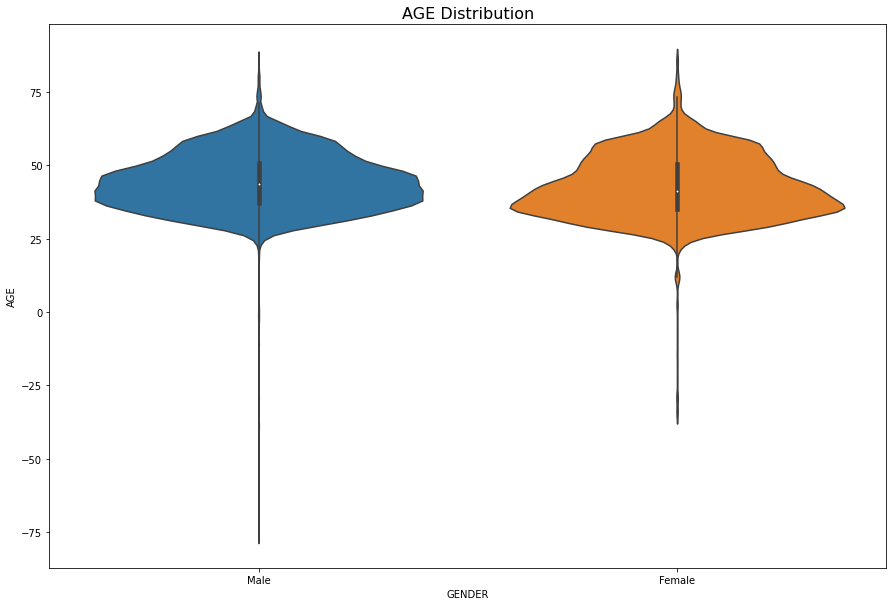

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.violinplot( x = "GENDER",y="AGE", data=data)
ax.set_title('AGE Distribution', fontsize=16);


Text(0.5, 1.0, 'Boxplot of Age')

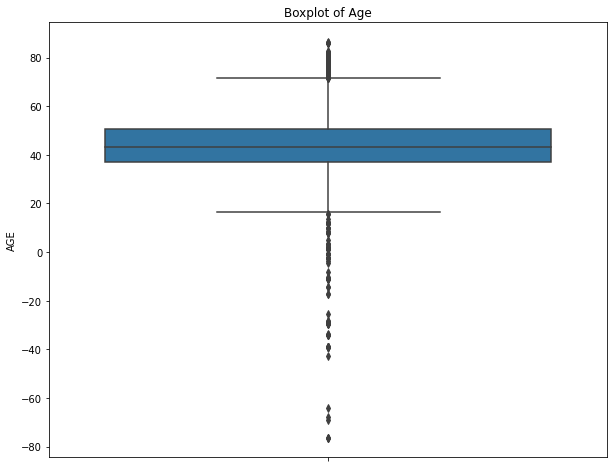

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, y = 'AGE')
plt.title("Boxplot of Age")


*   **There are some negative ages which need to be dropped.**
*   **The legal age for loans is 21 year.** 

*   **So, all ages less than 21 years will be dropped.**



In [ ]:
data.drop(data.loc[data.AGE < 21 ].index, inplace=True)

In [ ]:
data.drop(data.loc[data.AGE > 65 ].index, inplace=True)

Text(0.5, 1.0, 'Age')

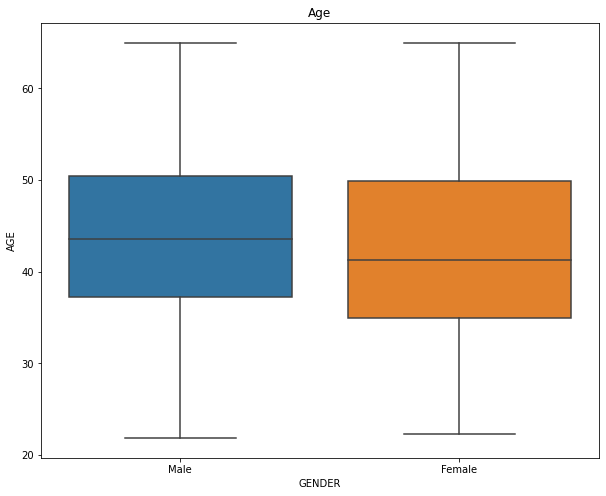

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, x = "GENDER", y = 'AGE')
plt.title("Age")

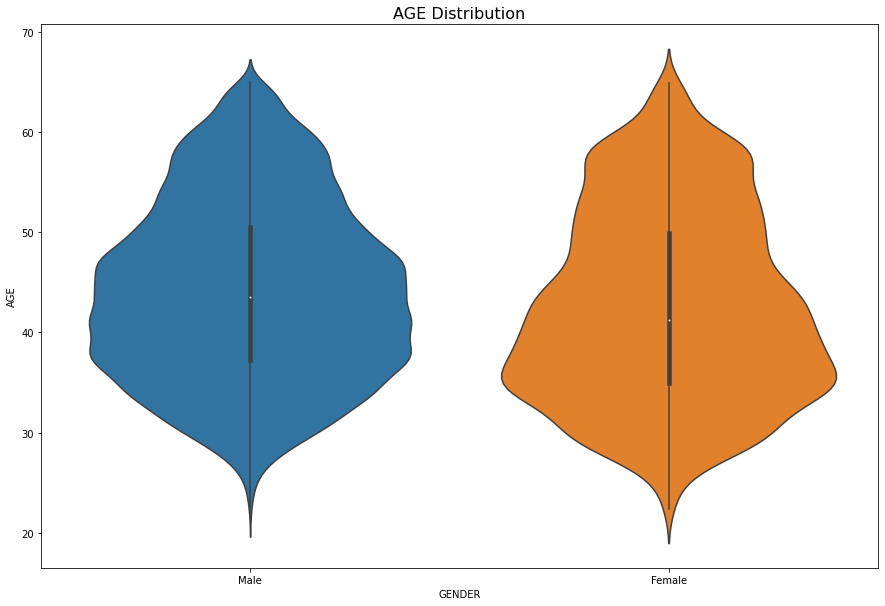

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y="AGE", data=data)
ax.set_title('AGE Distribution', fontsize=16);


**B) Outliers in Total Loan Amount.**

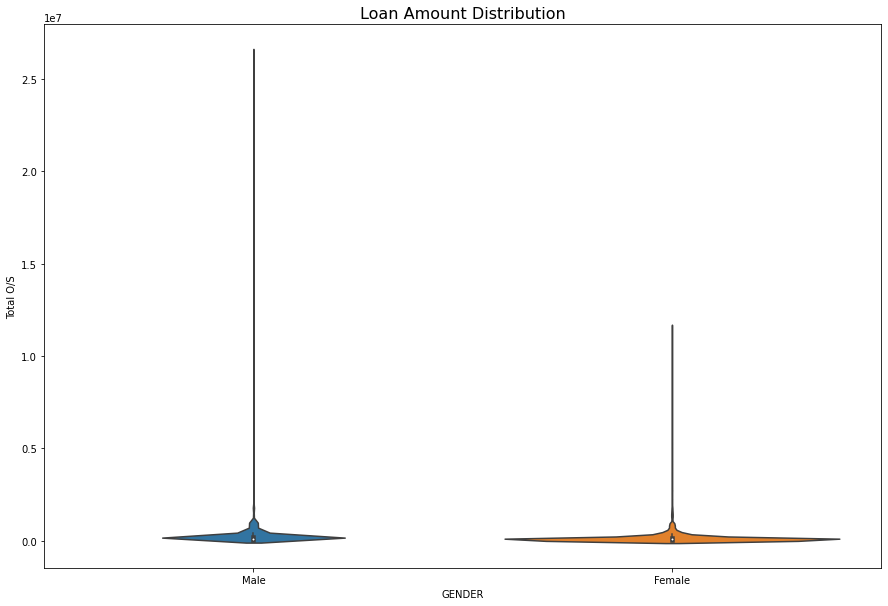

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y="Total O/S", data=data)
ax.set_title('Loan Amount Distribution', fontsize=16);

Text(0.5, 1.0, 'Total O/S')

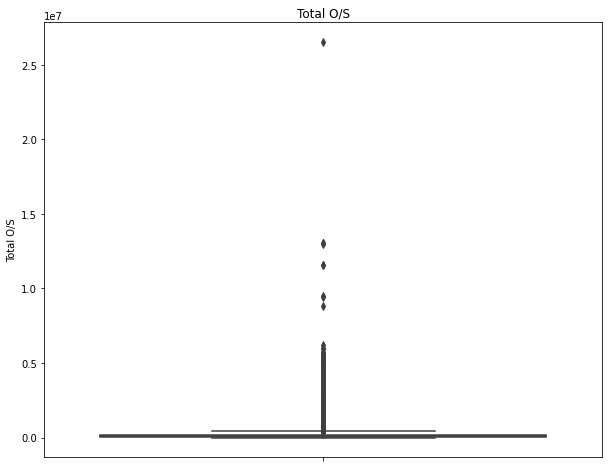

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, y = 'Total O/S')
plt.title("Total O/S")


*   **Abu Dhabi Commercial Bank (ADCB) Website says that the minimum value for a loan is 10K EGP**

*   **So, all amounts less than 10K EGP will be dropped.**

*   **Also, it can be noted that there is an outlier with Loan Amount 25 Million EGP, so Loans greater than 15 Million will be dropped.**





In [ ]:
data.drop(data.loc[data['Total O/S'] < 5e3].index, inplace=True)
data.drop(data.loc[data['Total O/S'] > 2e6].index, inplace=True)

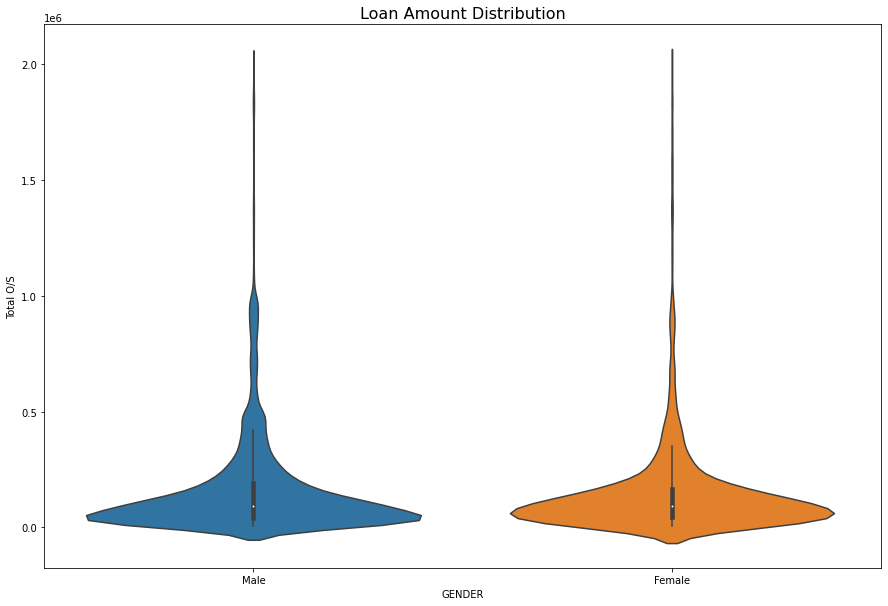

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y="Total O/S", data=data)
ax.set_title('Loan Amount Distribution', fontsize=16);

Text(0.5, 1.0, 'Total O/S')

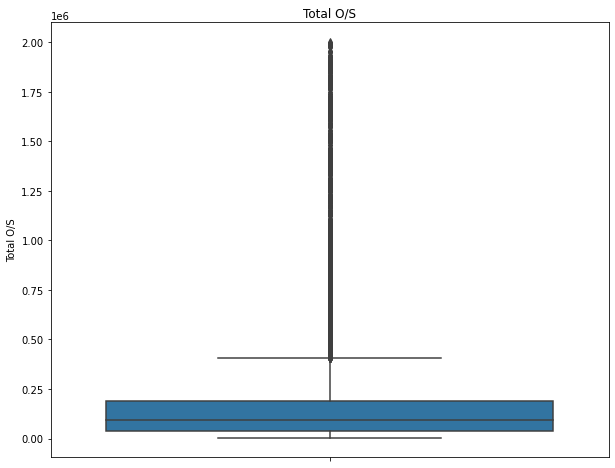

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, y = 'Total O/S')
plt.title("Total O/S")

**C) Boxplot of Loan Term in Month.**

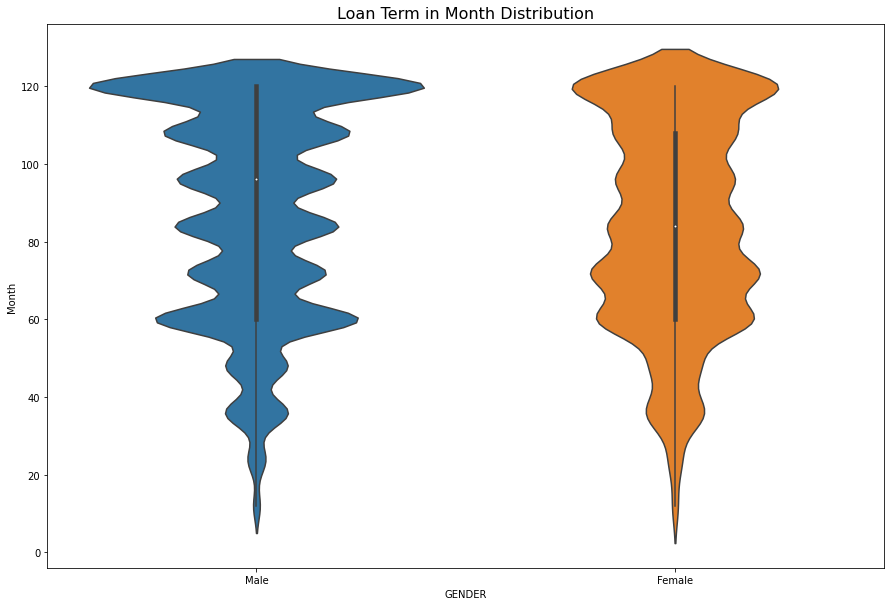

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y="TENOR_@Booking", data=data)
ax.set_ylabel("Month")
ax.set_title('Loan Term in Month Distribution', fontsize=16);

In [ ]:
data.drop(data.loc[data['TENOR_@Booking'] > 120].index, inplace=True)


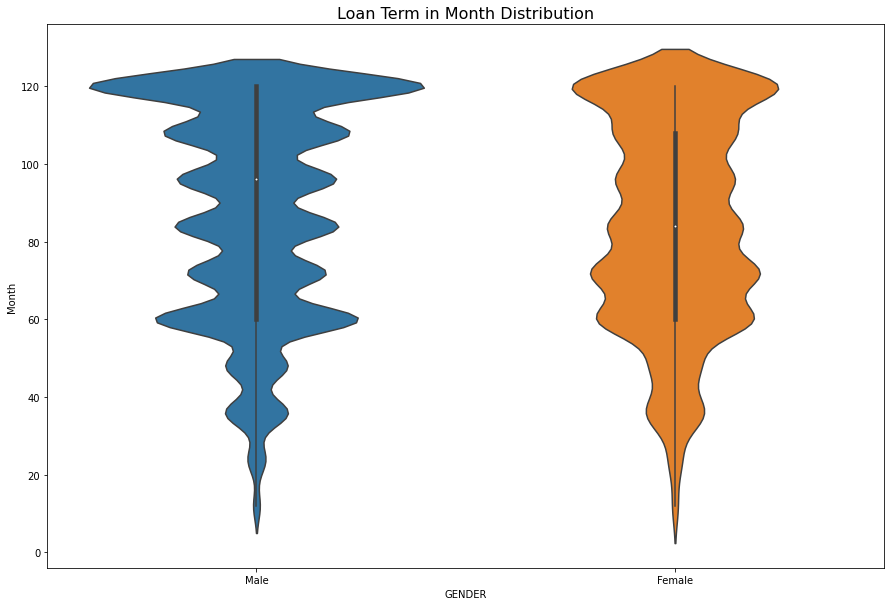

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y="TENOR_@Booking", data=data)
ax.set_ylabel("Month")
ax.set_title('Loan Term in Month Distribution', fontsize=16);

Text(0.5, 1.0, 'Loan Term in Month')

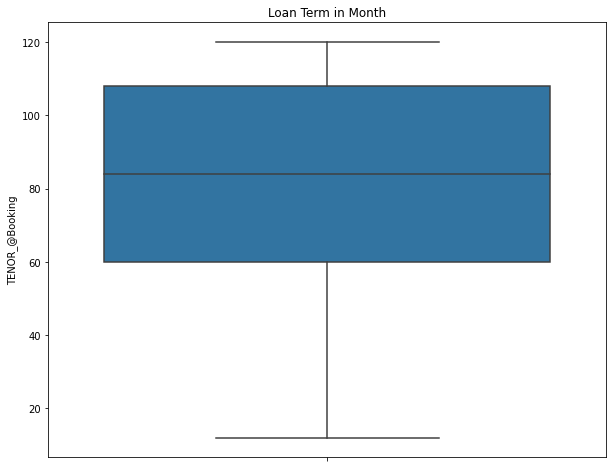

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, y = 'TENOR_@Booking')
plt.title("Loan Term in Month")

**C) Boxplot of Days past dues.**

Text(0.5, 1.0, 'Days past dues')

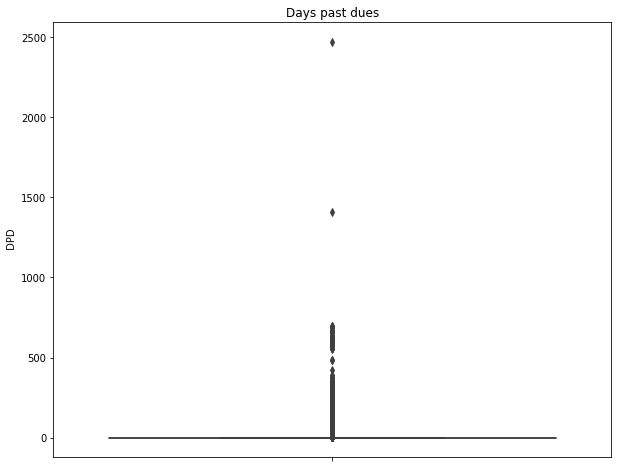

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data, y = ' DPD')
plt.title("Days past dues")

In [ ]:
data.drop(data.loc[data[' DPD'] > 700].index, inplace=True)


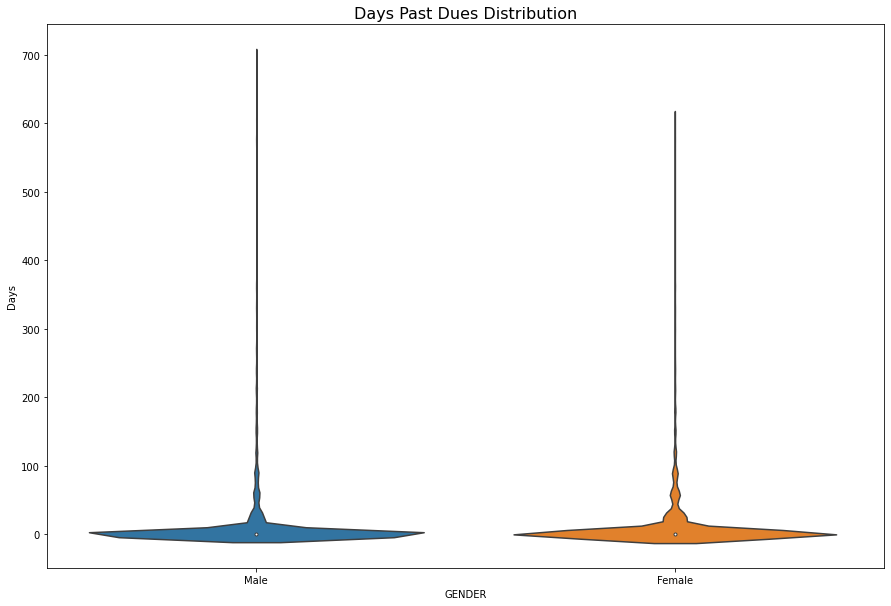

In [ ]:
plt.figure(figsize=(15,10))

ax =sns.violinplot( x = "GENDER",y=" DPD", data=data)
ax.set_ylabel("Days")
ax.set_title('Days Past Dues Distribution', fontsize=16);

# ***Countplots:***

**A) Number of Males and Females**

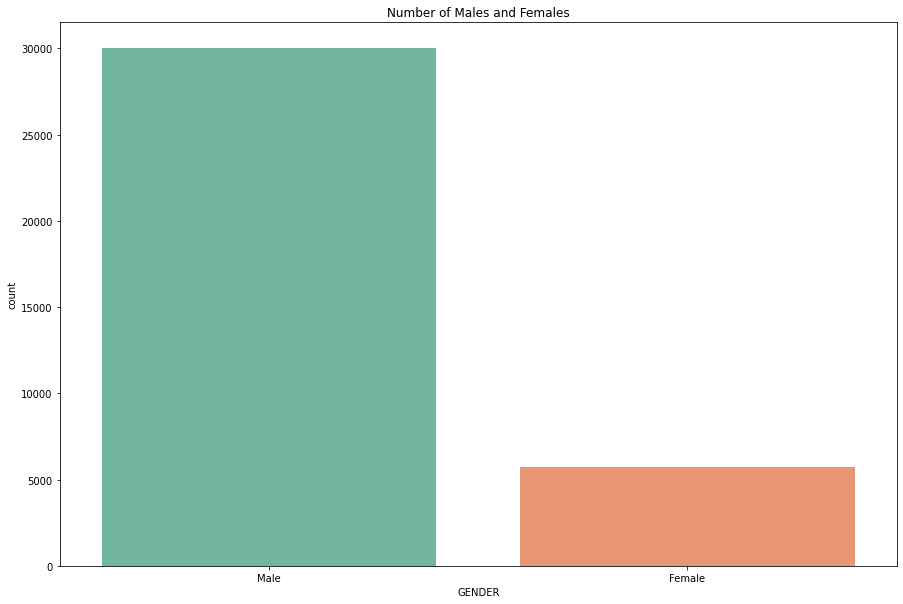

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Number of Males and Females')
sns.countplot(x = 'GENDER', data = data,  palette = 'Set2')
plt.show()

**Comment: The number of Males in the dataset is much more than the number of females.**

**B) Number of Customers in each Segment**

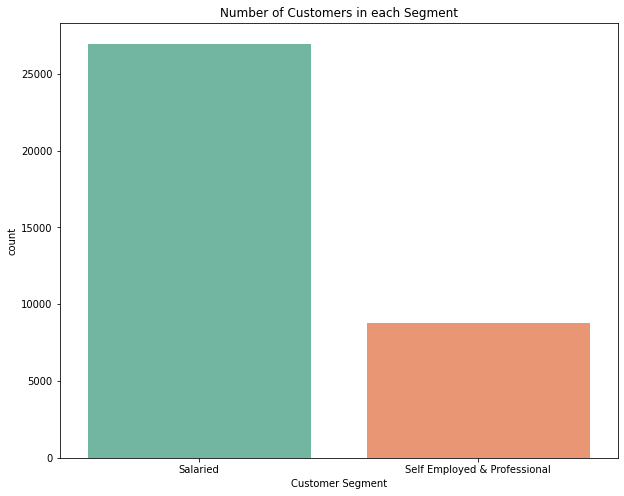

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Number of Customers in each Segment')
sns.countplot(x = 'Customer Segment', data = data,  palette = 'Set2')
plt.show()

**Comment: The number of People in the Salaried Customer Segment is much more than people in the Self Employed & Professional Segment.**

**C) Customer Segments And Gender**

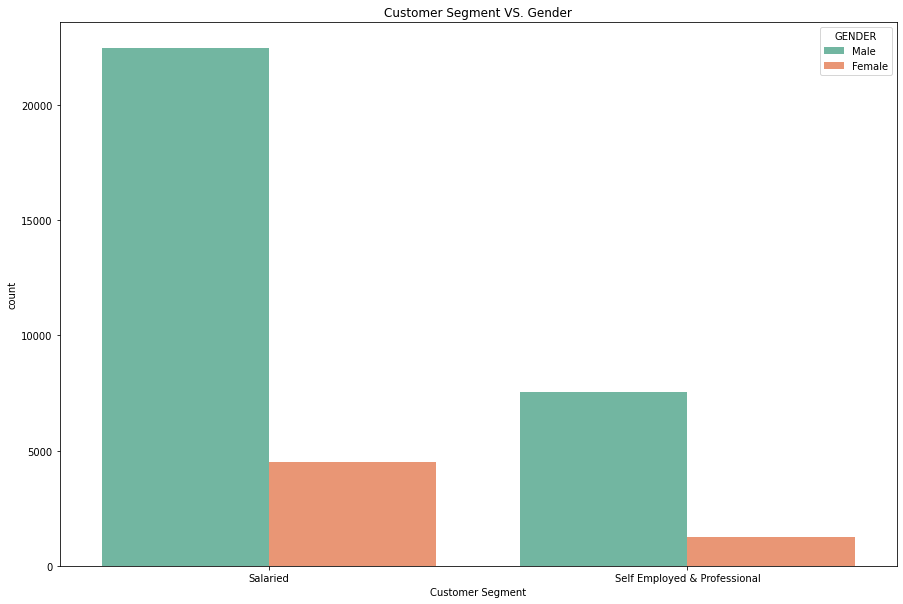

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Customer Segment VS. Gender')
sns.countplot(x = 'Customer Segment', hue = 'GENDER', data = data, palette ='Set2')

**D) Number of Loans that were booked per each day of the week**

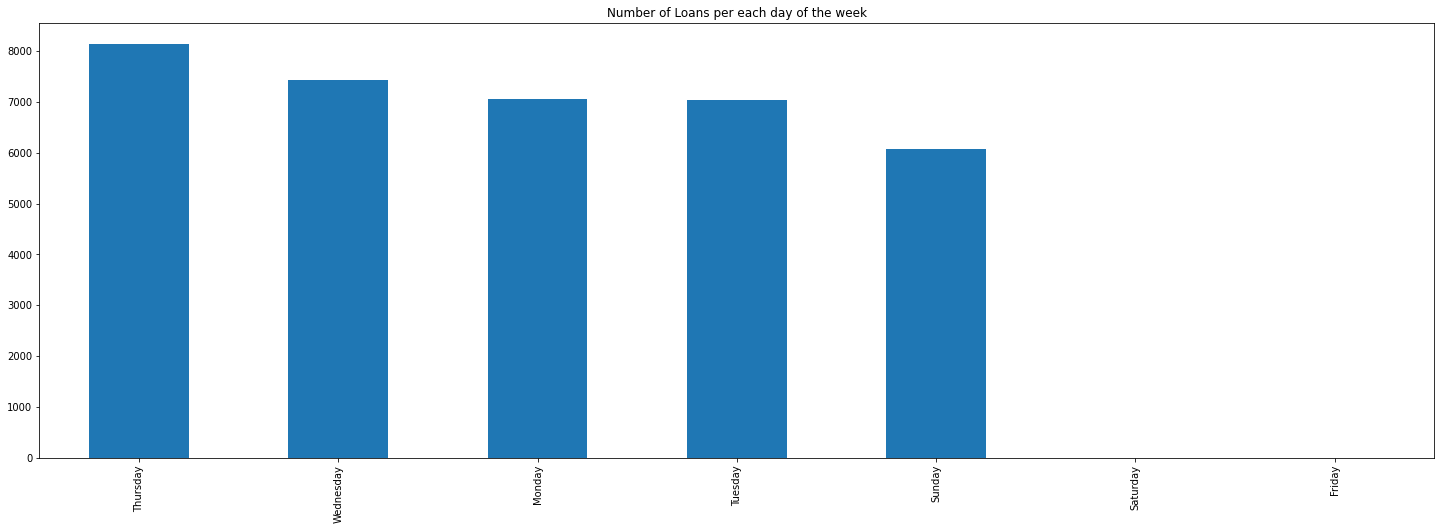

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of Loans per each day of the week')
data['BOOKING_day'].value_counts().plot.bar();

**Comment: Most Loans were booked on Thursday.**

**E) Number of Loans Booked per each perid (Month-Year)**

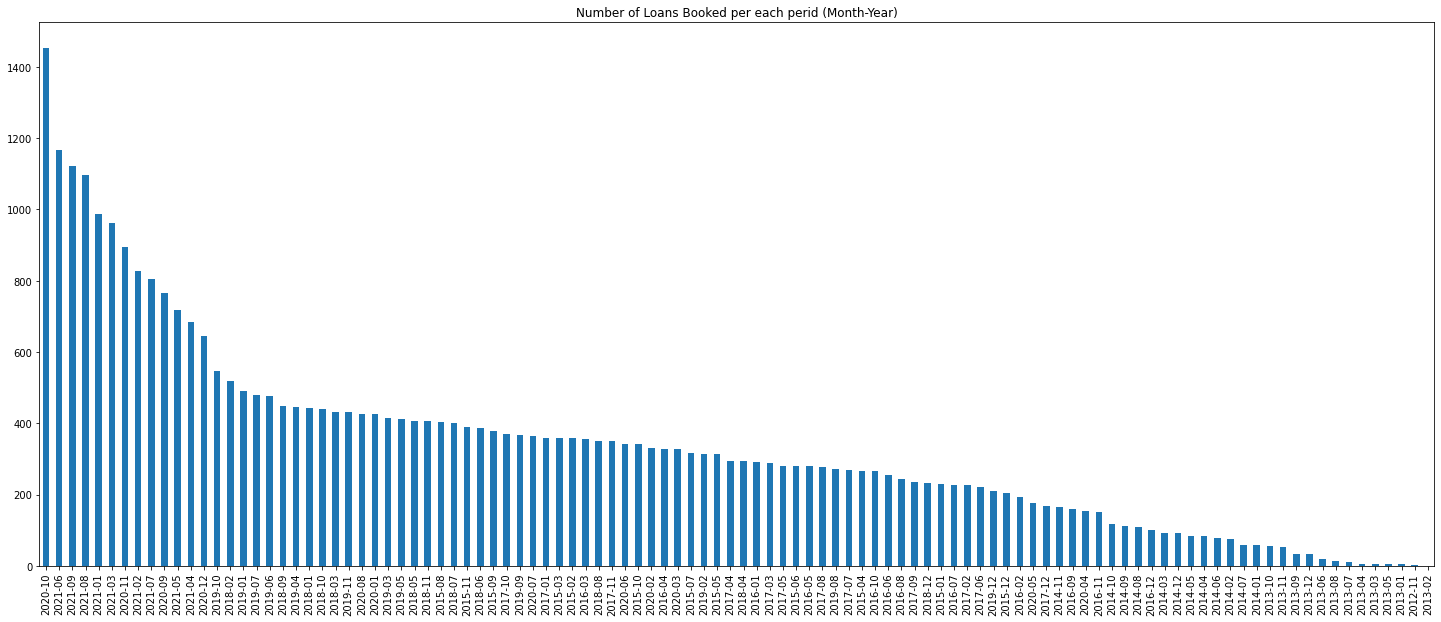

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Number of Loans Booked per each perid (Month-Year)')
data['BOOKING_year_month'].value_counts().plot.bar()

**Comment: Most Loans were booked in 10-2020.**

**F) Number of Loans that were booked in each Month**

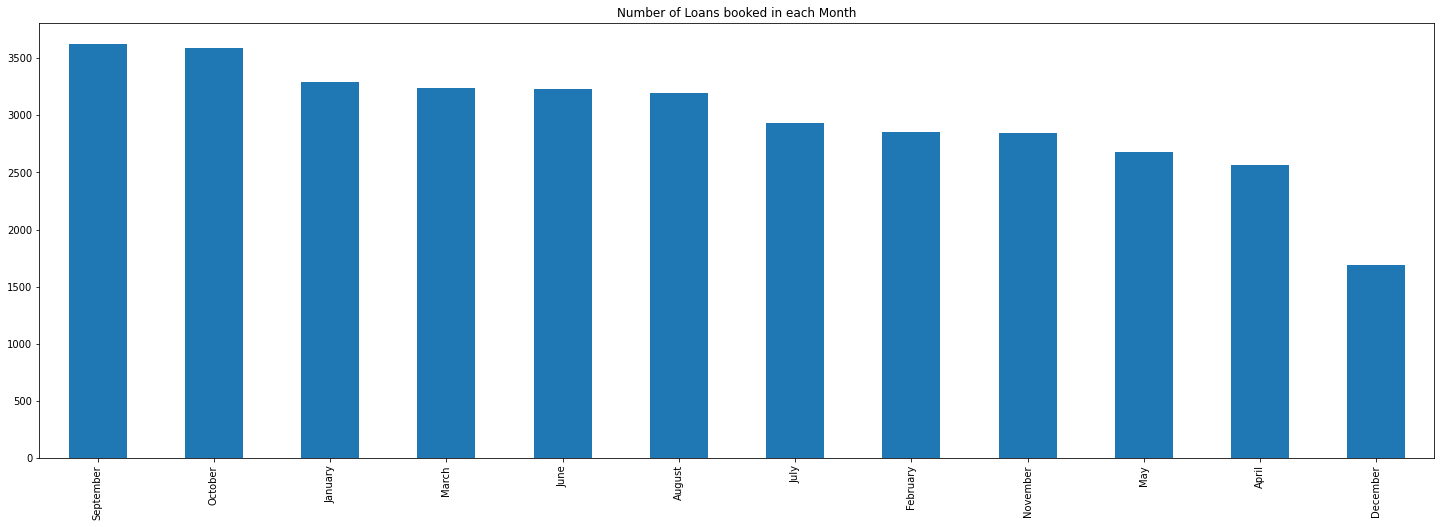

In [ ]:
plt.figure(figsize=(25,8))
plt.title('Number of Loans booked in each Month')
data['BOOKING_month'].value_counts().plot.bar();

**Comment: Most Loans were booked in September and October.**

# ***Correlation Matrix***

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

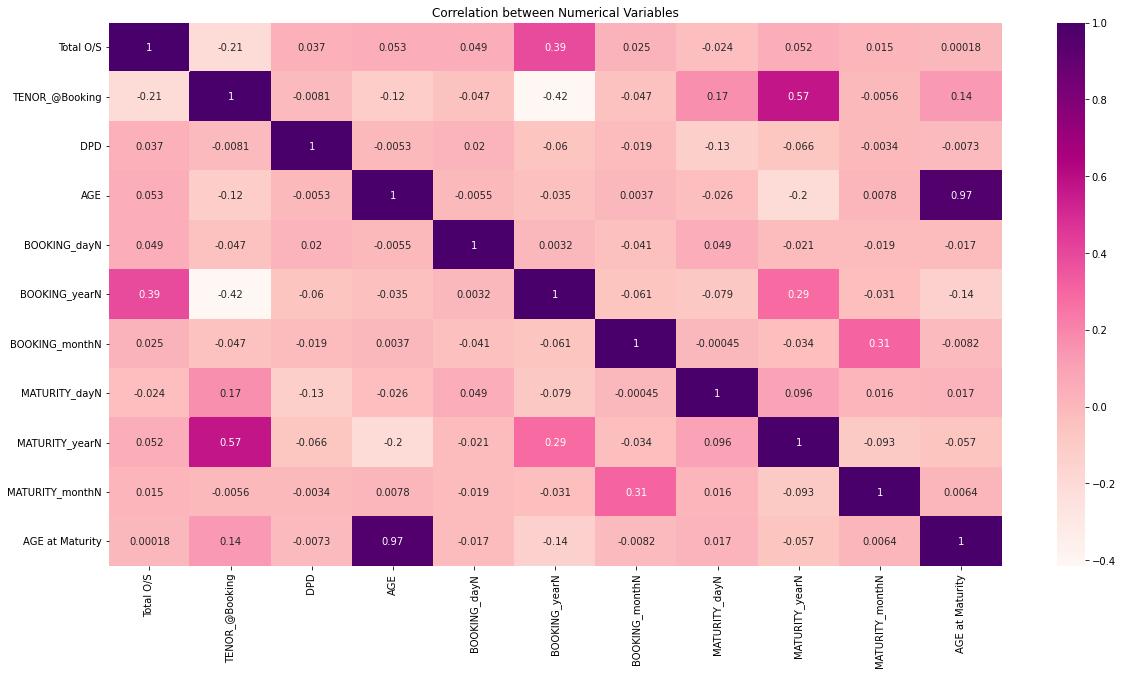

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu")
plt.title('Correlation between Numerical Variables')
plt.xticks(rotation=90)

# **5) One Hot Encoding**

**One Hot Encoding for Gender and Customer Segment Features**

In [ ]:
#One hot encoding
data = pd.get_dummies(data, columns= ['GENDER' , 'Customer Segment'])
data.head()

,Total O/S,TENOR_@Booking,BOOKING_DATE,MATURITY_DATE,DPD,AGE,BOOKING_day,BOOKING_month,BOOKING_year_month,BOOKING_dayN,...,MATURITY_month,MATURITY_year_month,MATURITY_dayN,MATURITY_yearN,MATURITY_monthN,AGE at Maturity,GENDER_Female,GENDER_Male,Customer Segment_Salaried,Customer Segment_Self Employed & Professional
0,178630.00,120,2019-07-31,2029-04-03,0,38.469863,Wednesday,July,2019-07,31,...,April,2029-04,3,2029,4,48.469863,0,1,1,0
1,376444.57,120,2019-03-04,2028-07-03,0,58.212329,Monday,March,2019-03,4,...,July,2028-07,3,2028,7,68.212329,0,1,1,0
2,253984.28,84,2019-05-05,2025-07-03,0,56.806849,Sunday,May,2019-05,5,...,July,2025-07,3,2025,7,63.806849,0,1,1,0
3,779620.11,108,2021-04-26,2030-04-25,5,38.028767,Monday,April,2021-04,26,...,April,2030-04,25,2030,4,47.028767,0,1,0,1
4,103377.43,60,2021-04-27,2026-04-25,0,40.343836,Tuesday,April,2021-04,27,...,April,2026-04,25,2026,4,45.343836,0,1,1,0


In [ ]:
data.columns

Index(['Total O/S', 'TENOR_@Booking', 'BOOKING_DATE', 'MATURITY_DATE', ' DPD',
       'AGE', 'BOOKING_day', 'BOOKING_month', 'BOOKING_year_month',
       'BOOKING_dayN', 'BOOKING_yearN', 'BOOKING_monthN', 'MATURITY_day',
       'MATURITY_month', 'MATURITY_year_month', 'MATURITY_dayN',
       'MATURITY_yearN', 'MATURITY_monthN', 'AGE at Maturity', 'GENDER_Female',
       'GENDER_Male', 'Customer Segment_Salaried',
       'Customer Segment_Self Employed & Professional'],
      dtype='object')

In [ ]:
dropped_cols = ['BOOKING_DATE', 'MATURITY_DATE','BOOKING_day', 'BOOKING_month', 'BOOKING_year_month', 'MATURITY_day', 'MATURITY_month', 'MATURITY_year_month', 'MATURITY_dayN', 'MATURITY_yearN', 'MATURITY_monthN']
data.drop(dropped_cols,inplace=True, axis=1)

data.head()

,Total O/S,TENOR_@Booking,DPD,AGE,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN,AGE at Maturity,GENDER_Female,GENDER_Male,Customer Segment_Salaried,Customer Segment_Self Employed & Professional
0,178630.00,120,0,38.469863,31,2019,7,48.469863,0,1,1,0
1,376444.57,120,0,58.212329,4,2019,3,68.212329,0,1,1,0
2,253984.28,84,0,56.806849,5,2019,5,63.806849,0,1,1,0
3,779620.11,108,5,38.028767,26,2021,4,47.028767,0,1,0,1
4,103377.43,60,0,40.343836,27,2021,4,45.343836,0,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35744 entries, 0 to 38548
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total O/S                                      35744 non-null  float64
 1   TENOR_@Booking                                 35744 non-null  int64  
 2    DPD                                           35744 non-null  int64  
 3   AGE                                            35744 non-null  float64
 4   BOOKING_dayN                                   35744 non-null  int64  
 5   BOOKING_yearN                                  35744 non-null  int64  
 6   BOOKING_monthN                                 35744 non-null  int64  
 7   AGE at Maturity                                35744 non-null  float64
 8   GENDER_Female                                  35744 non-null  uint8  
 9   GENDER_Male                                    357

# **6) Feature Scaling using Standard Scaler**

In [ ]:
scaler = StandardScaler()
scaler.fit(data)
data_Scaled = scaler.transform(data)

data_Scaled = pd.DataFrame(data_Scaled,columns=data.columns)

In [ ]:
data_Scaled.head()

,Total O/S,TENOR_@Booking,DPD,AGE,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN,AGE at Maturity,GENDER_Female,GENDER_Male,Customer Segment_Salaried,Customer Segment_Self Employed & Professional
0,0.055045,1.192872,-0.245392,-0.597356,1.451335,0.248993,0.184847,-0.294254,-0.436661,0.436661,0.570803,-0.570803
1,0.932995,1.192872,-0.245392,1.591216,-1.460150,0.248993,-1.006761,1.888221,-0.436661,0.436661,0.570803,-0.570803
2,0.389486,-0.119525,-0.245392,1.435410,-1.352318,0.248993,-0.410957,1.401207,-0.436661,0.436661,0.570803,-0.570803
3,2.722386,0.755406,-0.131537,-0.646254,0.912171,1.161111,-0.708859,-0.453563,-0.436661,0.436661,-1.751918,1.751918
4,-0.278944,-0.994455,-0.245392,-0.389615,1.020004,1.161111,-0.708859,-0.639828,-0.436661,0.436661,0.570803,-0.570803


# **7) PCA**

In [ ]:
pca_sklearn = PCA()
data_new = pca_sklearn.fit_transform(data_Scaled)

In [ ]:
def biplot(score,coeff,names,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()

    ax.scatter(xs * scalex,ys * scaley)
    for i, txt in enumerate(names):
        ax.annotate(txt, (xs[i] * scalex, ys[i] * scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    

In [ ]:
data.columns

Index(['Total O/S', 'TENOR_@Booking', ' DPD', 'AGE', 'BOOKING_dayN',
       'BOOKING_yearN', 'BOOKING_monthN', 'AGE at Maturity', 'GENDER_Female',
       'GENDER_Male', 'Customer Segment_Salaried',
       'Customer Segment_Self Employed & Professional'],
      dtype='object')

In [ ]:
cols = ['Total', 'Loan Term', ' DPD', 'AGE', 'BOOKING_dayN',
       'BOOKING_yearN', 'BOOKING_monthN', 'Maturity Age', 'GENDER_Female',
       'GENDER_Male', 'Salaried',
       'Emp&Prof']

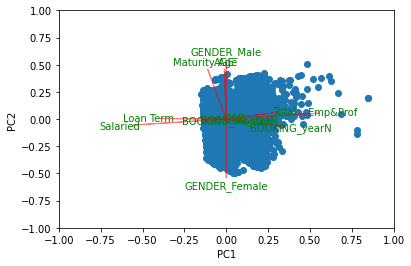

In [ ]:
#Call the function. Use only the 2 PCs.
biplot(data_new[:,0:2],np.transpose(pca_sklearn.components_[0:2, :]),[],labels = list(cols))
plt.show()


<Figure size 1080x720 with 0 Axes>

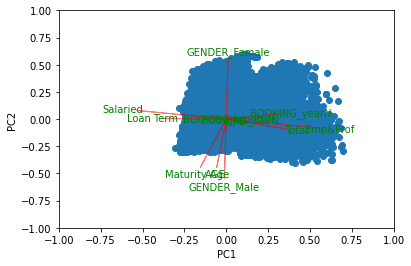

In [ ]:
#Call the function. Use only the 2 PCs.
plt.figure(figsize=(15,10))

biplot(data_new[:,0:2],np.transpose(pca_sklearn.components_[0:2, :]),[],labels = list(cols))
plt.show()

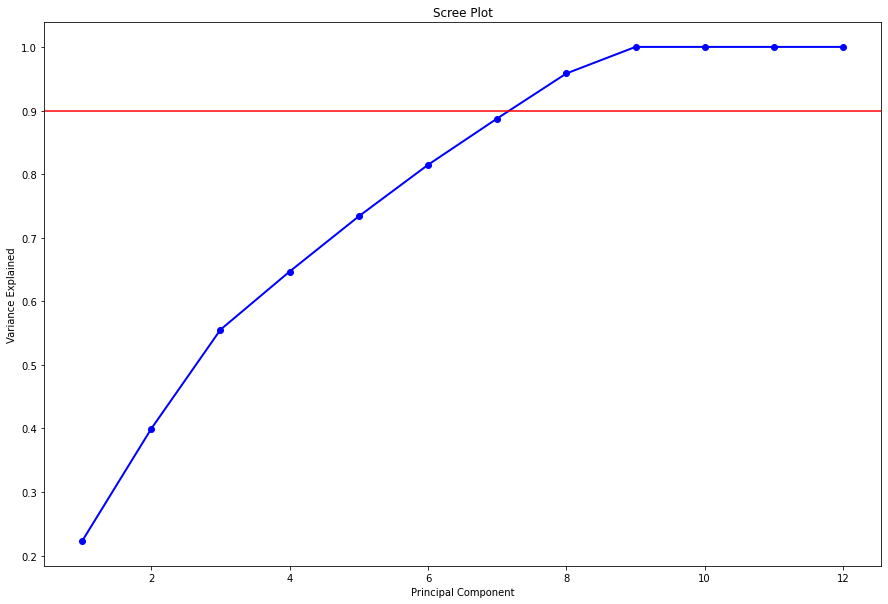

In [ ]:
PC_values = np.arange(pca_sklearn.n_components_) + 1
plt.figure(figsize=(15,10))
plt.plot(PC_values,np.cumsum(pca_sklearn.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.axhline(0.9, c='r')
plt.show()

**So, we can explaine a variance ratio of 0.9 using only 6 PCs out of the 12 PCs**

# **8) Clustring**

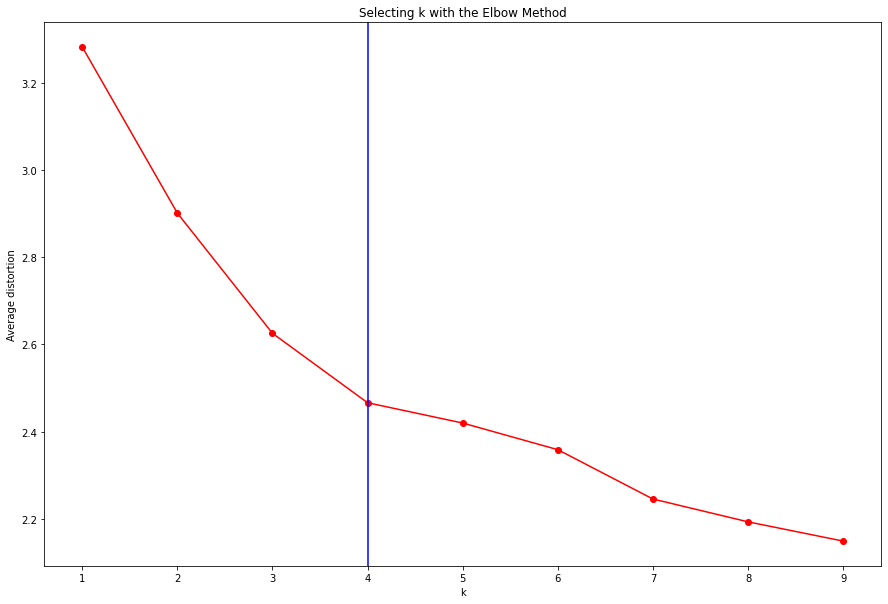

In [ ]:
clusters = range(1,10)

meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(data_Scaled)  
    predict=km.predict(data_Scaled)
    meanDistortions.append(sum(np.min(cdist(data_Scaled,km.cluster_centers_, 'euclidean'), axis=1)) / 
                           data_Scaled.shape[0])

plt.figure(figsize=(15,10))

plt.plot(clusters, meanDistortions, 'ro-')

plt.title('Selecting k with the Elbow Method')
plt.axvline(4, c='b')

plt.xlabel('k');

plt.ylabel('Average distortion');

The best k value is 4

But lets compare between the silhoutte score for k = 3,4,5 and 6 

The silhouette coefficients measure has a range of [-1, 1].
Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. 

*   **It is required to choose the silhoutte that is closer to +1**



#  ***Visualization for clusters***
  *for the first 2 features (Total O/S	and TENOR_@Booking)*

For n_clusters = 3 The average silhouette_score is : 0.31220752106783983
For n_clusters = 4 The average silhouette_score is : 0.1949636970359901
For n_clusters = 5 The average silhouette_score is : 0.18870629751290185
For n_clusters = 6 The average silhouette_score is : 0.19566370179644024


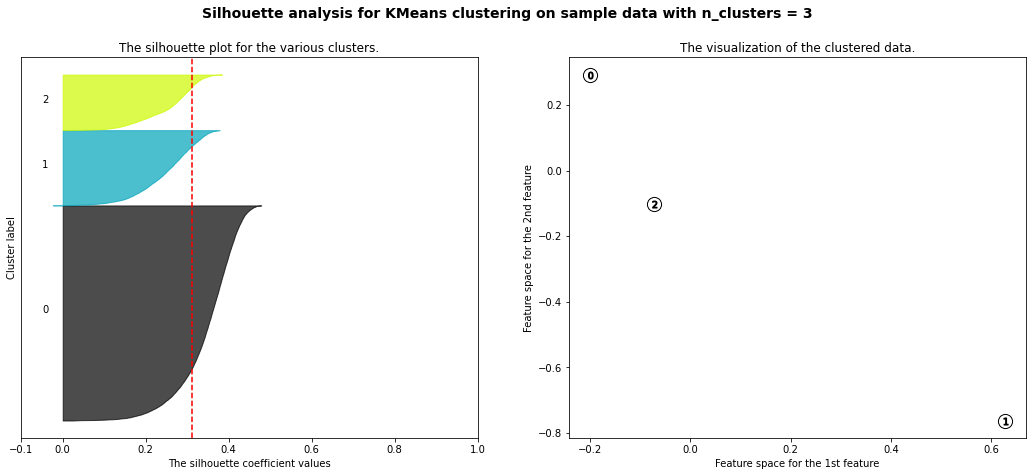

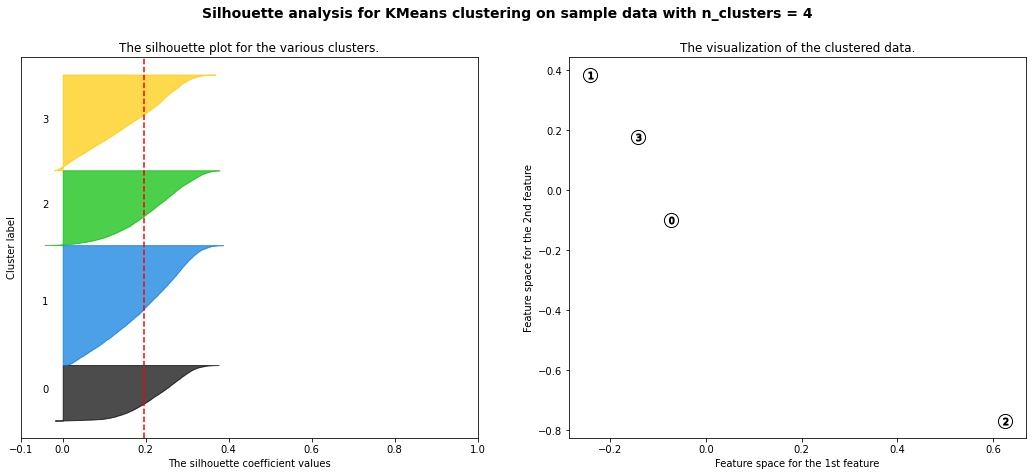

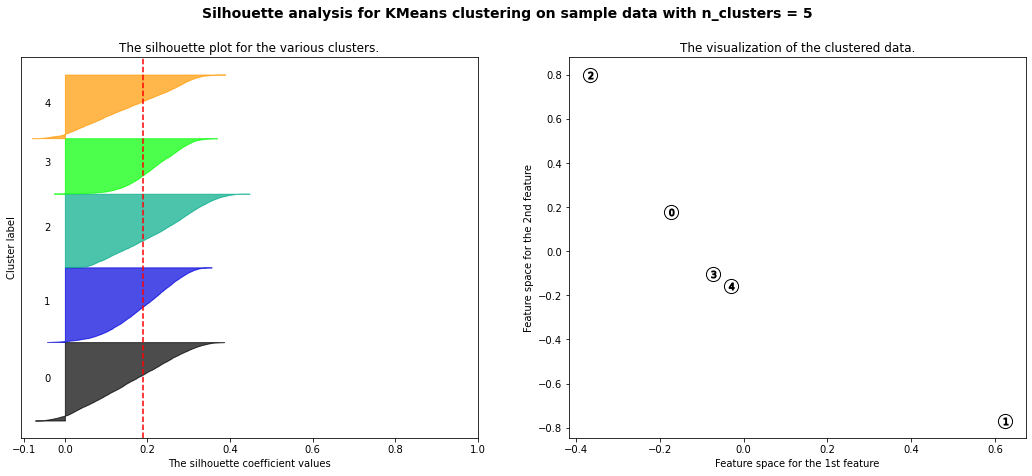

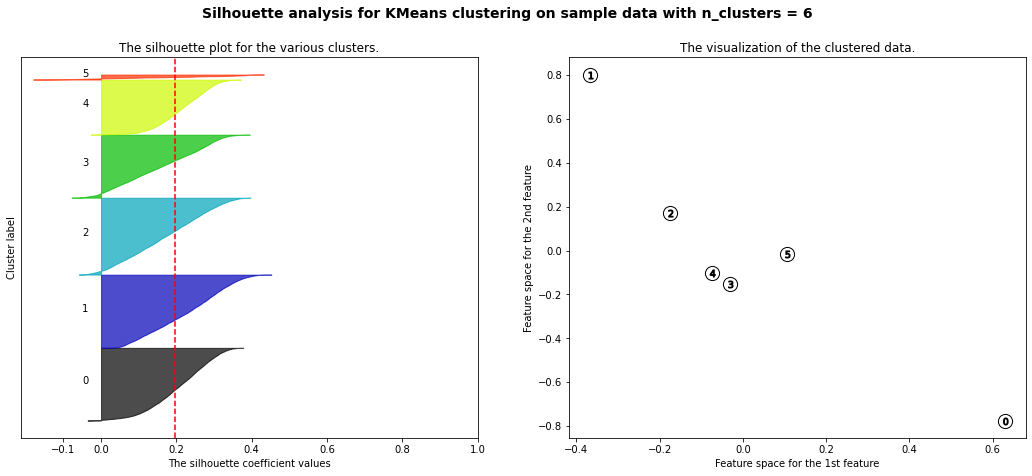

In [ ]:
range_n_clusters = [3,4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_Scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_Scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_Scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the comparsion made in the last cell code: when we have 3 clusters the score is closest to 1 

*   **Therefore we will have 3 clusters**



In the left figure the thickness of each cluster label represents the number of examples in this group. while the right figure represents the distances between the centroids of each group.

#**9) Hierarchical Clustering**


In [ ]:
data_Scaled.head()

,Total O/S,TENOR_@Booking,DPD,AGE,BOOKING_dayN,BOOKING_yearN,BOOKING_monthN,AGE at Maturity,GENDER_Female,GENDER_Male,Customer Segment_Salaried,Customer Segment_Self Employed & Professional
0,-0.017676,1.196810,-0.233978,-0.606114,1.453737,0.239610,0.186654,-0.315016,-0.437708,0.437708,0.579784,-0.579784
1,0.519095,1.196810,-0.233978,1.485185,-1.459859,0.239610,-1.004437,1.784911,-0.437708,0.437708,0.579784,-0.579784
2,0.186798,-0.103945,-0.233978,1.336304,-1.351948,0.239610,-0.408891,1.316318,-0.437708,0.437708,0.579784,-0.579784
3,1.613112,0.763225,-0.126419,-0.652839,0.914182,1.153245,-0.706664,-0.468300,-0.437708,0.437708,-1.724781,1.724781
4,-0.221874,-0.971114,-0.233978,-0.407606,1.022093,1.153245,-0.706664,-0.647519,-0.437708,0.437708,0.579784,-0.579784


#### Linkage Method (Complete)

In [ ]:
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage='complete')
model.fit(data_Scaled)

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [ ]:
Z = linkage(data_Scaled, metric='euclidean', method='complete')

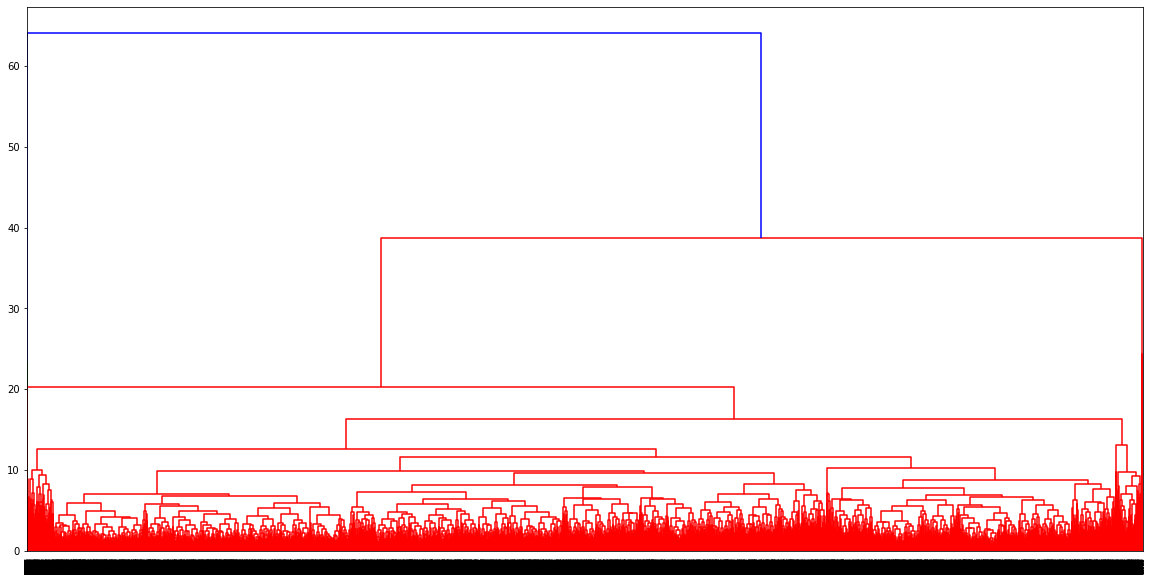

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

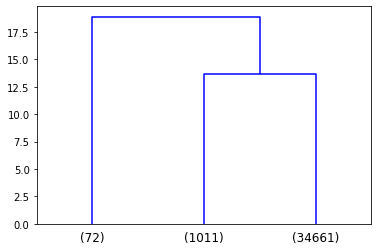

In [ ]:
dendrogram(Z, truncate_mode='lastp',p=3)
plt.show()

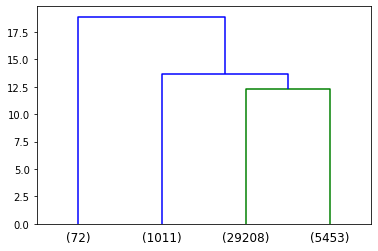

In [ ]:
dendrogram(Z, truncate_mode='lastp',p=4)
plt.show()

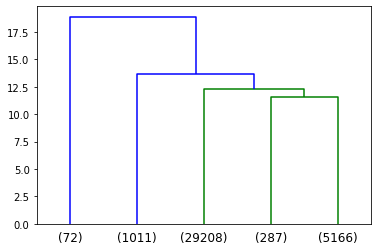

In [ ]:
dendrogram(Z, truncate_mode='lastp',p=5)
plt.show()

In [ ]:
max_d = 9
clusters = fcluster(Z, max_d, criterion='distance')
complete_sc = silhouette_score(data_Scaled,clusters)

In [ ]:
tempResultsDf = pd.DataFrame({'linkage':['complete'], 
                              'silhouette_score': complete_sc})
results = pd.concat([tempResultsDf])
results = results[['linkage', 'silhouette_score']]
results

,linkage,silhouette_score
0,complete,0.096204


#### Linkage Method (Average)

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(data_Scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
Z2 = linkage(data_Scaled, metric='euclidean', method='average')

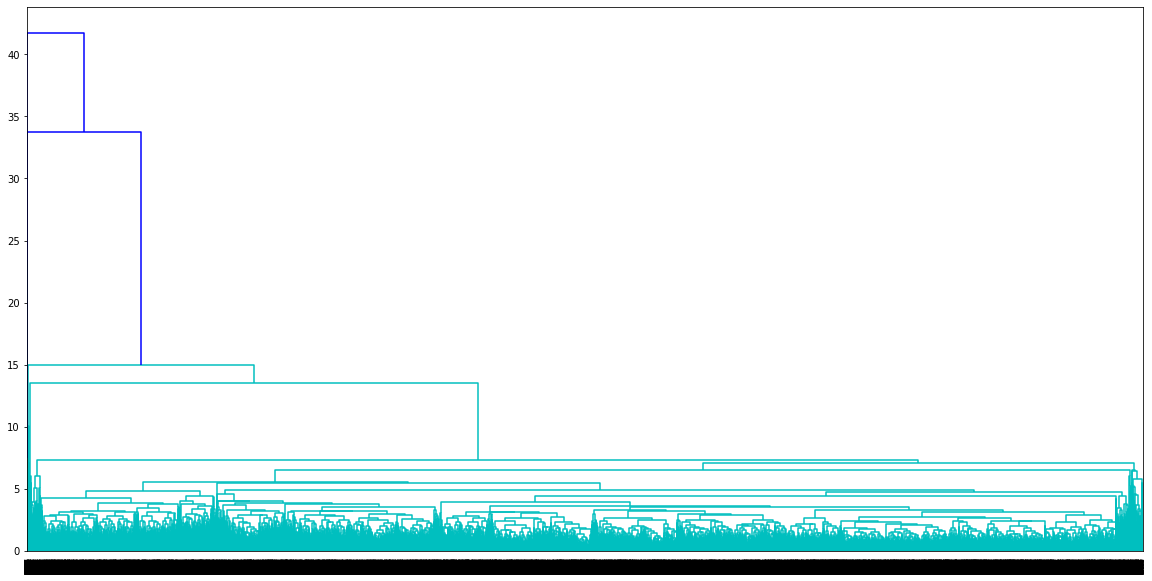

In [ ]:
plt.figure(figsize=(20, 10))
dendrogram(Z2)
plt.show()

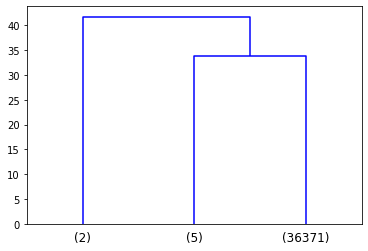

In [ ]:
dendrogram(Z2, truncate_mode='lastp',p=3)
plt.show()

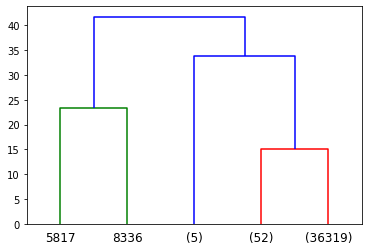

In [ ]:
dendrogram(Z2, truncate_mode='lastp',p=5)
plt.show()

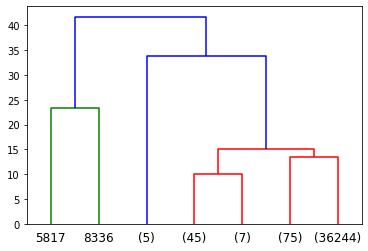

In [ ]:
dendrogram(Z2, truncate_mode='lastp',p=7)
plt.show()

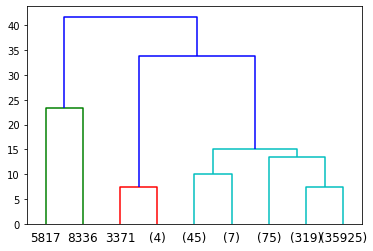

In [ ]:
dendrogram(Z2, truncate_mode='lastp',p=9)
plt.show()

In [ ]:
max_d = 9
clusters = fcluster(Z2, max_d, criterion='distance')
average_sc = silhouette_score(data_Scaled,clusters)

In [ ]:
tempResultsDf = pd.DataFrame({'linkage':['average'], 
                              'silhouette_score': average_sc})
results = pd.concat([tempResultsDf])
results = results[['linkage', 'silhouette_score']]
results

,linkage,silhouette_score
0,average,0.65744


**Then Average Linkage with k = 7 can be chosen as the final model for Hierarchical clustering**